In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/final_result.csv')

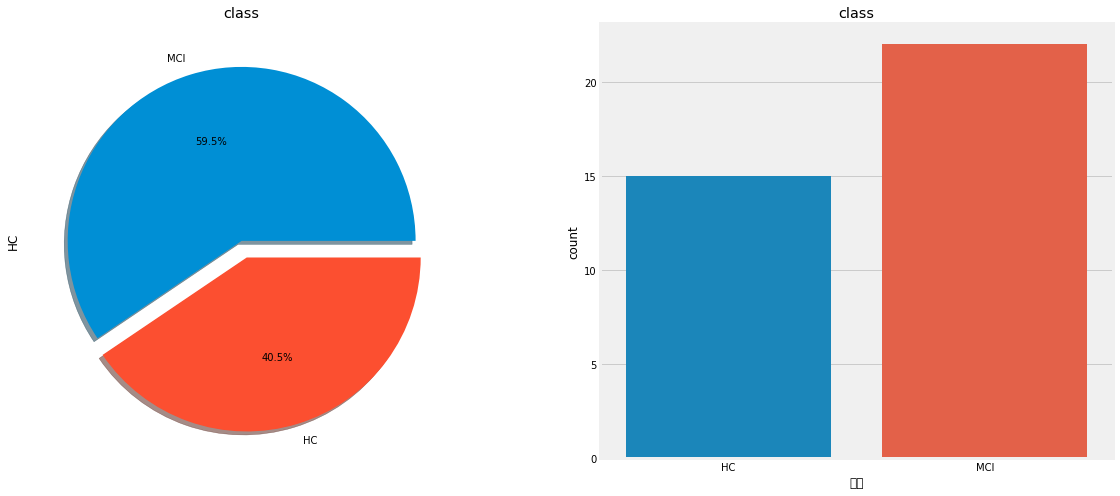

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['집단'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('HC')
sns.countplot('집단',data=data,ax=ax[1])
ax[1].set_title('class')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt 

# 범주형 변수 -> 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
cat_columns = ['성별','집단']
num_columns = ['나이', '교육연한', 'panel1', 'panel2', 'panel3', 'panel4', 'panel5', 'panel6',
               'out_rate', 'panel1Target_var_x', 'panel1Target_var_y', 'panel2Target_var_x', 'panel2Target_var_y', 'panel3Target_var_x', 'panel3Target_var_y', 'panel4Target_var_x', 'panel4Target_var_y', 
               'panel5Target_var_x', 'panel5Target_var_y', 'error', 'panel1_head_distance', 'panel2_head_distance', 'panel3_head_distance', 'panel4_head_distance', 'panel5_head_distance', 'panel7_head_distance',
                 'distance_hand', 'panel1_hand_distance', 'panel2_hand_distance', 'panel3_hand_distance', 'panel4_hand_distance', 'panel5_hand_distance', 'panel7_hand_distance', 'total_time', 'distance_head', 'distance_hand',
                 'head_angular_velocity_average','head_velocity', 'hand_velocity', 'password_error', 'correct']

In [ ]:
enc_classes ={}
def encoding_label(x): # x: 범주형 타입의 컬럼
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)

    enc_classes[x.name] = le.classes_  # x.name: 컬럼명

    return label

cat_df = data[cat_columns].apply(encoding_label)
display(cat_df)

,성별,집단
0,0,0
1,1,0
2,0,1
3,1,1
4,0,1
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1


In [ ]:
# 연속형 변수 -> feature scaling, normalization
from sklearn.preprocessing import MinMaxScaler
num_df = data[num_columns]
num_df_scaled = MinMaxScaler().fit_transform(num_df)
num_df_normal = pd.DataFrame(num_df_scaled, columns=list(num_df.columns))
display(num_df_normal)
# display(num_df_normal.isnull().sum())

rowName = cat_df.index
dict = {}
for i, v in enumerate(rowName):
    dict[i] = v

num_df_normal = num_df_normal.rename(index=dict)

,나이,교육연한,panel1,panel2,panel3,panel4,panel5,panel6,out_rate,panel1Target_var_x,...,panel5_hand_distance,panel7_hand_distance,total_time,distance_head,distance_hand,head_angular_velocity_average,head_velocity,hand_velocity,password_error,correct
0,0.703704,0.941176,0.056689,0.027972,0.039695,0.029024,0.151880,0.179849,0.228558,0.027257,...,0.076212,0.428686,0.157048,0.133055,0.218066,0.258286,0.417918,0.383441,0.571429,1.0
1,0.740741,0.941176,0.038549,0.025175,0.083969,0.052770,0.010526,0.019303,0.000000,0.081772,...,0.035660,0.053515,0.031536,0.064800,0.081894,0.665819,0.701484,0.601827,0.142857,0.6
2,0.481481,0.705882,0.024943,0.009790,0.036641,0.018470,0.000000,0.010358,0.385218,0.141397,...,0.000000,0.034461,0.000000,0.012861,0.010298,1.000000,0.298492,0.538122,0.285714,0.6
3,0.925926,0.823529,0.197279,0.102098,0.351145,0.146438,0.148872,0.264595,0.597355,0.073254,...,0.096657,0.320609,0.341848,0.285482,0.253271,0.111038,0.475510,0.123428,0.571429,0.6
4,0.629630,0.882353,0.081633,0.086713,0.056489,0.215040,0.021053,0.096516,0.294959,0.069847,...,0.037767,0.141000,0.138442,0.064868,0.105422,0.287622,0.084199,0.198701,0.142857,0.6
5,0.500000,0.941176,0.136054,0.051748,0.047328,0.044855,0.024060,0.006591,0.159067,0.080068,...,0.043306,0.029338,0.035951,0.044923,0.097555,0.635002,0.411975,0.631814,0.000000,1.0
6,0.851852,0.941176,0.072562,0.047552,0.116031,0.031662,0.028571,0.026365,0.242895,1.000000,...,0.033457,0.033326,0.051403,0.091432,0.058412,0.544886,0.783419,0.369009,0.000000,1.0
7,0.666667,0.705882,0.120181,0.113287,0.250382,0.054090,0.042105,0.107345,0.363875,0.364566,...,0.089852,0.236692,0.163040,0.167663,0.246228,0.249839,0.582990,0.420908,0.571429,0.6
8,0.981481,0.705882,1.000000,0.734266,0.358779,0.000000,0.482707,0.435970,0.394955,0.480409,...,0.140000,0.475027,0.747398,0.444891,0.393533,0.021457,0.238851,0.000000,0.857143,0.4
9,0.444444,0.529412,0.156463,0.283916,0.244275,0.059367,0.093233,0.249058,0.646294,0.241908,...,0.090815,0.350560,0.312204,0.367984,0.242679,0.125054,0.825261,0.142338,1.000000,0.6


In [ ]:
#열 기준 합치기
final_preprocess = cat_df.join(num_df_normal)

In [ ]:
# 타겟 설정 - 집단
target = '집단'

# 타겟의 분포 확인
print(final_preprocess[target].value_counts(normalize = True))


X_set = final_preprocess.drop([target], axis = 1)
y_set = final_preprocess[[target]]

1    0.594595
0    0.405405
Name: 집단, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_set = final_preprocess.drop([target], axis = 1)
y_set = final_preprocess[[target]]
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, 
                                                    stratify = y_set,
                                                    random_state = 2) 

In [ ]:
# 학습 데이터와 테스트 데이터 안의 결과변수 비율
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

# 메인 코드

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distribs_rf={'n_estimators': randint(low=1, high=200),#[80, 100, 150, 200],
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'max_depth' : randint(5, 21)}# [3, 5, 10, 15]}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), 
                                      param_distributions = param_distribs_rf, 
                                      cv = 5,
                                      n_iter = 500,
                                      random_state = 2)

random_search_rf.fit(X_train, y_train)


print("Best Parameter: {}".format(random_search_rf.best_params_))

FForest = RandomForestClassifier(max_features = random_search_rf.best_params_['max_features'], 
                                 n_estimators = random_search_rf.best_params_['n_estimators'], 
                                 max_depth = random_search_rf.best_params_['max_depth'], 
                                 class_weight='balanced',
                                 random_state = 2)
FForest.fit(X_train, y_train)

###################################################################################################################

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score,  plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

FForest_pred_test=FForest.predict(X_test)

FForest_confusion_test=confusion_matrix(y_test, FForest_pred_test)
print(FForest_confusion_test)

# print('검증 정확도:', random_search_rf.best_score_)
print("정확도:", accuracy_score(y_test, FForest_pred_test))

집단
1     0.586207
0     0.413793
dtype: float64
집단
1     0.625
0     0.375
dtype: float64
Best Parameter: {'max_depth': 16, 'max_features': 'log2', 'n_estimators': 4}
[[2 1]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

F1: 0.9090909090909091
정확도: 0.875
재현율: 1.0
정밀도: 0.8333333333333334
특이도: 0.6666666666666666


<Figure size 2160x2160 with 0 Axes>

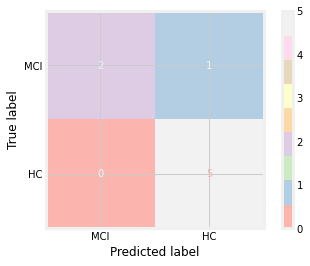

                          Feature  Importance
7                          panel5    0.078005
25           panel4_head_distance    0.072669
18             panel5Target_var_x    0.067916
23           panel2_head_distance    0.064367
3                          panel1    0.057503
40                 password_error    0.055478
15             panel3Target_var_y    0.045189
21                  distance_head    0.041877
17             panel4Target_var_y    0.039591
8                          panel6    0.039428
6                          panel4    0.039069
4                          panel2    0.038932
12             panel2Target_var_x    0.035356
11             panel1Target_var_y    0.033233
1                              나이    0.030719
5                          panel3    0.026749
22           panel1_head_distance    0.025383
14             panel3Target_var_x    0.024611
16             panel4Target_var_x    0.024235
24           panel3_head_distance    0.022773
13             panel2Target_var_y 

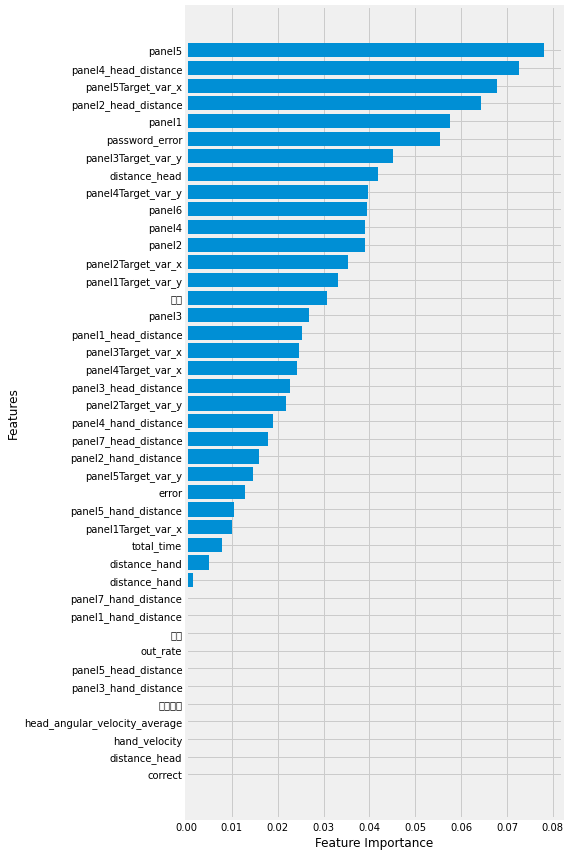

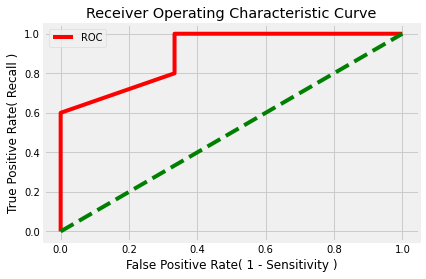

AUC 값: 0.9000


In [ ]:
# 오차행렬 시각화
plt.figure(figsize =(30, 30))
plot_confusion_matrix(FForest, 
                      X_test, y_test,
                      include_values = True,
                      display_labels = ['MCI', 'HC'], # 목표변수 이름
                      cmap = 'Pastel1') # 컬러맵
plt.savefig('confusion_matrix.png') # 오차행렬 자료 저장
plt.show() # 따로 그리기

# 변수 중요도 산출
X_variable_name = (['성별', '나이', '교육연한', 'panel1', 'panel2', 'panel3', 'panel4', 'panel5', 'panel6',
               'out_rate', 'panel1Target_var_x', 'panel1Target_var_y', 'panel2Target_var_x', 'panel2Target_var_y', 'panel3Target_var_x', 'panel3Target_var_y', 'panel4Target_var_x', 'panel4Target_var_y', 
               'panel5Target_var_x', 'panel5Target_var_y', 'error', 'distance_head', 'panel1_head_distance', 'panel2_head_distance', 'panel3_head_distance', 'panel4_head_distance', 'panel5_head_distance', 'panel7_head_distance',
                 'distance_hand', 'panel1_hand_distance', 'panel2_hand_distance', 'panel3_hand_distance', 'panel4_hand_distance', 'panel5_hand_distance', 'panel7_hand_distance', 'total_time', 'distance_head', 'distance_hand',
                 'head_angular_velocity_average', 'hand_velocity', 'password_error', 'correct'])

dt_importance = pd.DataFrame()
dt_importance['Feature'] = X_variable_name#list(X_set.columns) # 설명변수 이름
dt_importance['Importance'] = FForest.feature_importances_ # 설명변수 중요도 산출

# 변수 중요도 내림차순 정렬
dt_importance.sort_values("Importance", ascending = False, inplace = True)
print(dt_importance.round(8))

# 변수 중요도 시각화
# 변수 중요도 오름차순 정렬
dt_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
plt.figure(figsize =(8, 12))
plt.barh(y = coordinates, width = dt_importance["Importance"], align='center')
plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
plt.xlabel("Feature Importance") # x축 이름
plt.ylabel("Features") # y축 이름
plt.tight_layout()
plt.savefig('feature_importance.png') # 변수 중요도 그래프 저장
plt.show()

# ROC curve 그리기
prob = FForest.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate( 1 - Sensitivity )')
plt.ylabel('True Positive Rate( Recall )')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.savefig('ROC_curve.png')
plt.show()

# AUC 구하기
pred_proba = FForest.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(auc))